# **Alzheimer's Prediction**

Alzheimer's disease (AD) is the most common form of dementia that progressively damages brain cells, resulting in memory and thinking deficits, loss of basic abilities, and ultimately, death. Currently, the annual cost of treating AD is 1 Trillion USD and it is expected that by 2050, 152 Million peope will be affected by AD. While there is no cure for AD, its onset diagnosis can prevent it from becoming too severe thus improving patient’s life. Recent advancements in computer vision have found to be impactful, however the datasets for AD are limited and heavily imbalanced. Due to this severe class imbalance the classifiers are prone to be biased towards the majority class i.e., classifying a person with early symptoms as "Not Impaired" (No Alzheimer's) which is highly undesirable.

This dataset comprises a mix of real and synthetic axial MRIs and was developed to rectify the class imbalance in the original Kaggle Alzheimer's dataset, which featured four categories: "No Impairment", "Very Mild Impairment", "Mild Impairment", and "Moderate Impairment". Each category had 100, 70, 28, and 2 patients, respectively, and each patient's brain was sliced into 32 horizontal axial MRIs.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Importing the modules**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline

split-folders is a python package to split a dataset into training, validation, and test sets

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1))

Copying files: 6400 files [02:15, 47.37 files/s]


tf.keras.preprocessing.image_dataset_from_directory function to create TensorFlow tf.data.Dataset objects from the image datasets that were previously split and saved in the "output" directory.

In [ ]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
                                                               )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

**DATA VISUALISATION**

This code snippet is using Matplotlib to visualize a grid of images from the training dataset. It generates a 3x3 grid displaying the first 9 images from the training dataset, along with their corresponding class labels.

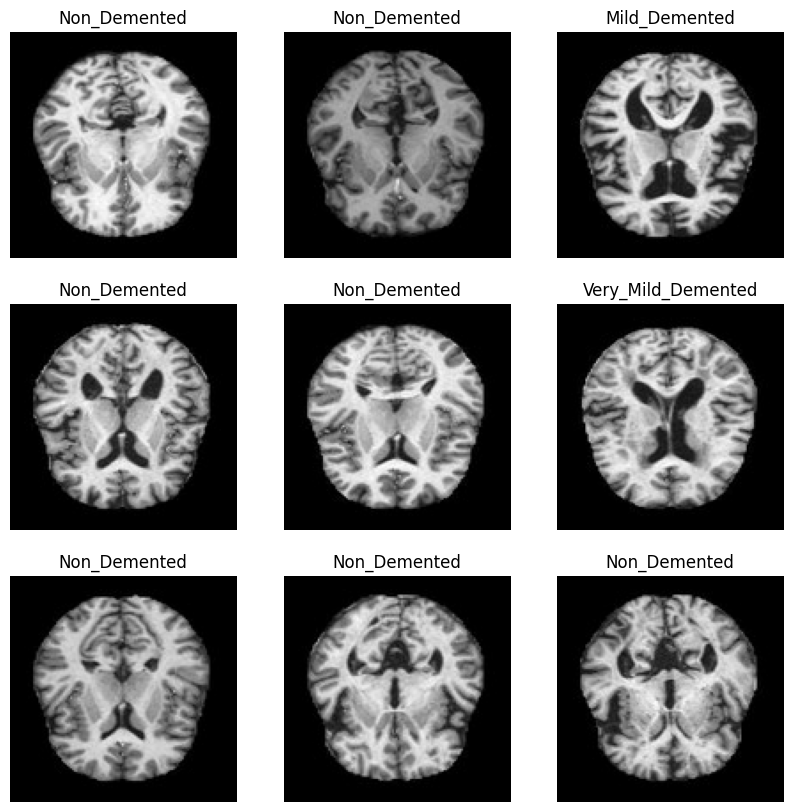

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

This bar plot shows the distribution or counts of different classes within the dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

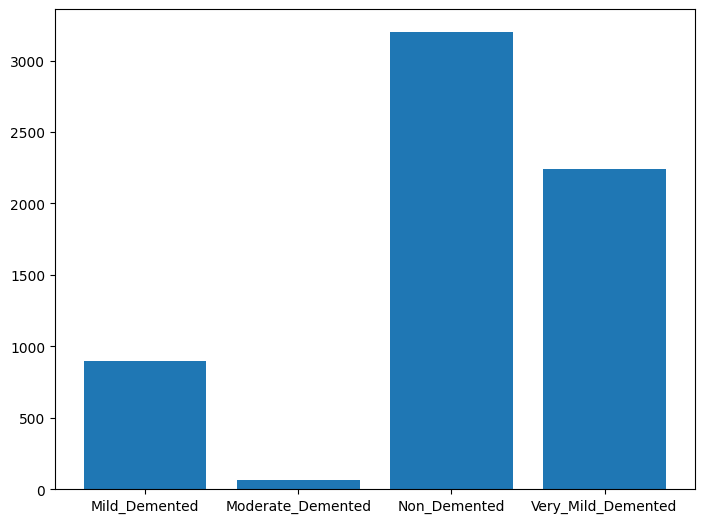

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]
ax.bar(class_names,size)
plt.show

## XCEPTION AND XGBOOST

- Xception stands for "Extreme Inception," and it's a deep convolutional neural network inspired by the Inception architecture.
- Xception uses a series of depth-wise separable convolutions, where each convolutional operation is split into two separate operations: depth-wise convolution and point-wise convolution.
- This architecture aims to capture spatial and channel-wise correlations efficiently, reducing computational complexity while maintaining or improving performance.
- It is used as a feature extractor for transfer learning.

In [ ]:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import Xception, preprocess_input
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Load your Alzheimer's dataset
# Replace 'your_dataset_path' with the path to your dataset
your_dataset_path = '/content/drive/MyDrive/Dataset'
data = load_files(your_dataset_path, shuffle=True)

# Load pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, pooling='avg', input_shape=(299, 299, 3))

# Function to extract features using Xception
def extract_xception_features(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    features = base_model.predict(img_array)
    return features.flatten()

# Extract features for each image in the dataset
features = [extract_xception_features(img_path) for img_path in data.filenames]

# Convert the list of features into a numpy array
features = np.array(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data.target, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(data.target)))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 322ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.02%


## XG BOOST and VGG16

- VGG, short for Visual Geometry Group, refers to a family of convolutional neural network (CNN) architectures.
- The key contributions of VGG networks were their deeper architectures and the demonstration that increasing network depth significantly improved performance in visual recognition tasks.
- VGG networks are characterized by their simplicity and uniformity in architecture. They consist primarily of 3x3 convolutional layers stacked on top of each other in increasing depth. They also use max-pooling layers to reduce spatial dimensions.
- The convolutional layers in VGG are typically followed by a few fully connected layers before the output layer for classification.
- It is used as a feature extractor  in transfer learning.

It displays the complete file paths for each file found within a directory or its subdirectories.

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_155.jpg
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_1557.jpg
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_156.jpg
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_1540.jpg
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_1548.jpg
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_1535.jpg
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_154.jpg
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_1558.jpg
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_1545.jpg
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_1533.jpg
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_1538.jpg
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_1568.jpg
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_1554.jpg
/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_1563.jpg


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your Alzheimer's dataset
# Replace 'your_dataset_path' with the path to your dataset
your_dataset_path = '/content/drive/MyDrive/Dataset'
data = load_files(your_dataset_path, shuffle=True)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

# Function to extract features using VGG16
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    features = base_model.predict(img_array)
    return features.flatten()

# Extract features for each image in the dataset
features = [extract_features(img_path) for img_path in data.filenames]

# Convert the list of features into a numpy array
features = np.array(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data.target, test_size=0.2, random_state=42)

# Now you can use X_train, X_test, y_train, and y_test for XGBoost or any other classifier
# Create an XGBoost classifier
import xgboost as xgb

model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(data.target)))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)




Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 903ms/step
Accuracy: 78.74%


In [ ]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 78.74%


## CNN


- CNN stands for Convolutional Neural Network, a class of deep neural networks.
- CNNs consist of a series of convolutional layers that apply learnable filters or kernels to input data. These filters perform convolutions across the input, capturing features like edges, textures, and patterns hierarchically.
- After convolutional layers, pooling layers (such as max pooling) are used to downsample the feature maps, reducing computational complexity and retaining the most important information.
- Dense layers learn complex patterns by combining features extracted by the convolutional layers.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

Compiling the model


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

Training the model

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=50, batch_size=32, verbose=1)

Epoch 1/50
81/81 [==============================] - 121s 1s/step - loss: 1.4321 - accuracy: 0.4684 - val_loss: 1.1041 - val_accuracy: 0.5164
Epoch 2/50
81/81 [==============================] - 104s 1s/step - loss: 0.9697 - accuracy: 0.5307 - val_loss: 0.9631 - val_accuracy: 0.5351
Epoch 3/50
81/81 [==============================] - 98s 1s/step - loss: 0.9009 - accuracy: 0.5760 - val_loss: 0.9002 - val_accuracy: 0.5741
Epoch 4/50
81/81 [==============================] - 98s 1s/step - loss: 0.8228 - accuracy: 0.6220 - val_loss: 0.8021 - val_accuracy: 0.6537
Epoch 5/50
81/81 [==============================] - 99s 1s/step - loss: 0.7522 - accuracy: 0.6664 - val_loss: 0.8178 - val_accuracy: 0.6069
Epoch 6/50
81/81 [==============================] - 94s 1s/step - loss: 0.6743 - accuracy: 0.7075 - val_loss: 0.6530 - val_accuracy: 0.7332
Epoch 7/50
81/81 [==============================] - 100s 1s/step - loss: 0.6039 - accuracy: 0.7437 - val_loss: 0.5283 - val_accuracy: 0.8159
Epoch 8/50
81/81 

In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

The plots provide insights into the training and validation accuracy as well as the training and validation loss over 50 epochs.

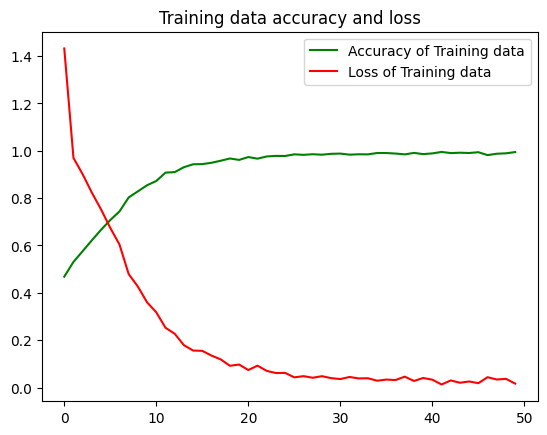

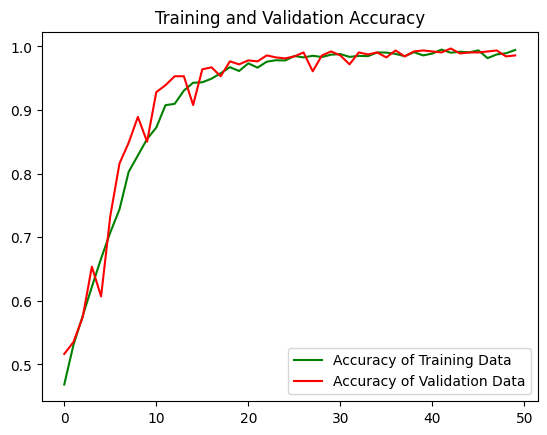

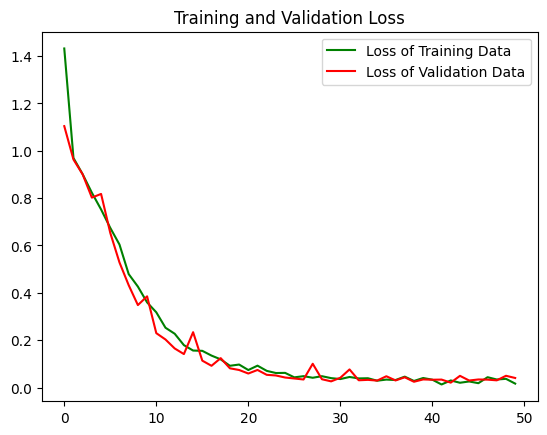

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 3s 235ms/step - loss: 0.0342 - accuracy: 0.9891


This code creates a visual representation of model predictions on the first 16 images of test dataset. It plots the images along with their actual labels and model-predicted labels, highlighting correct predictions in green and incorrect predictions in red.

1/1 [==============================] - 0s 24ms/step


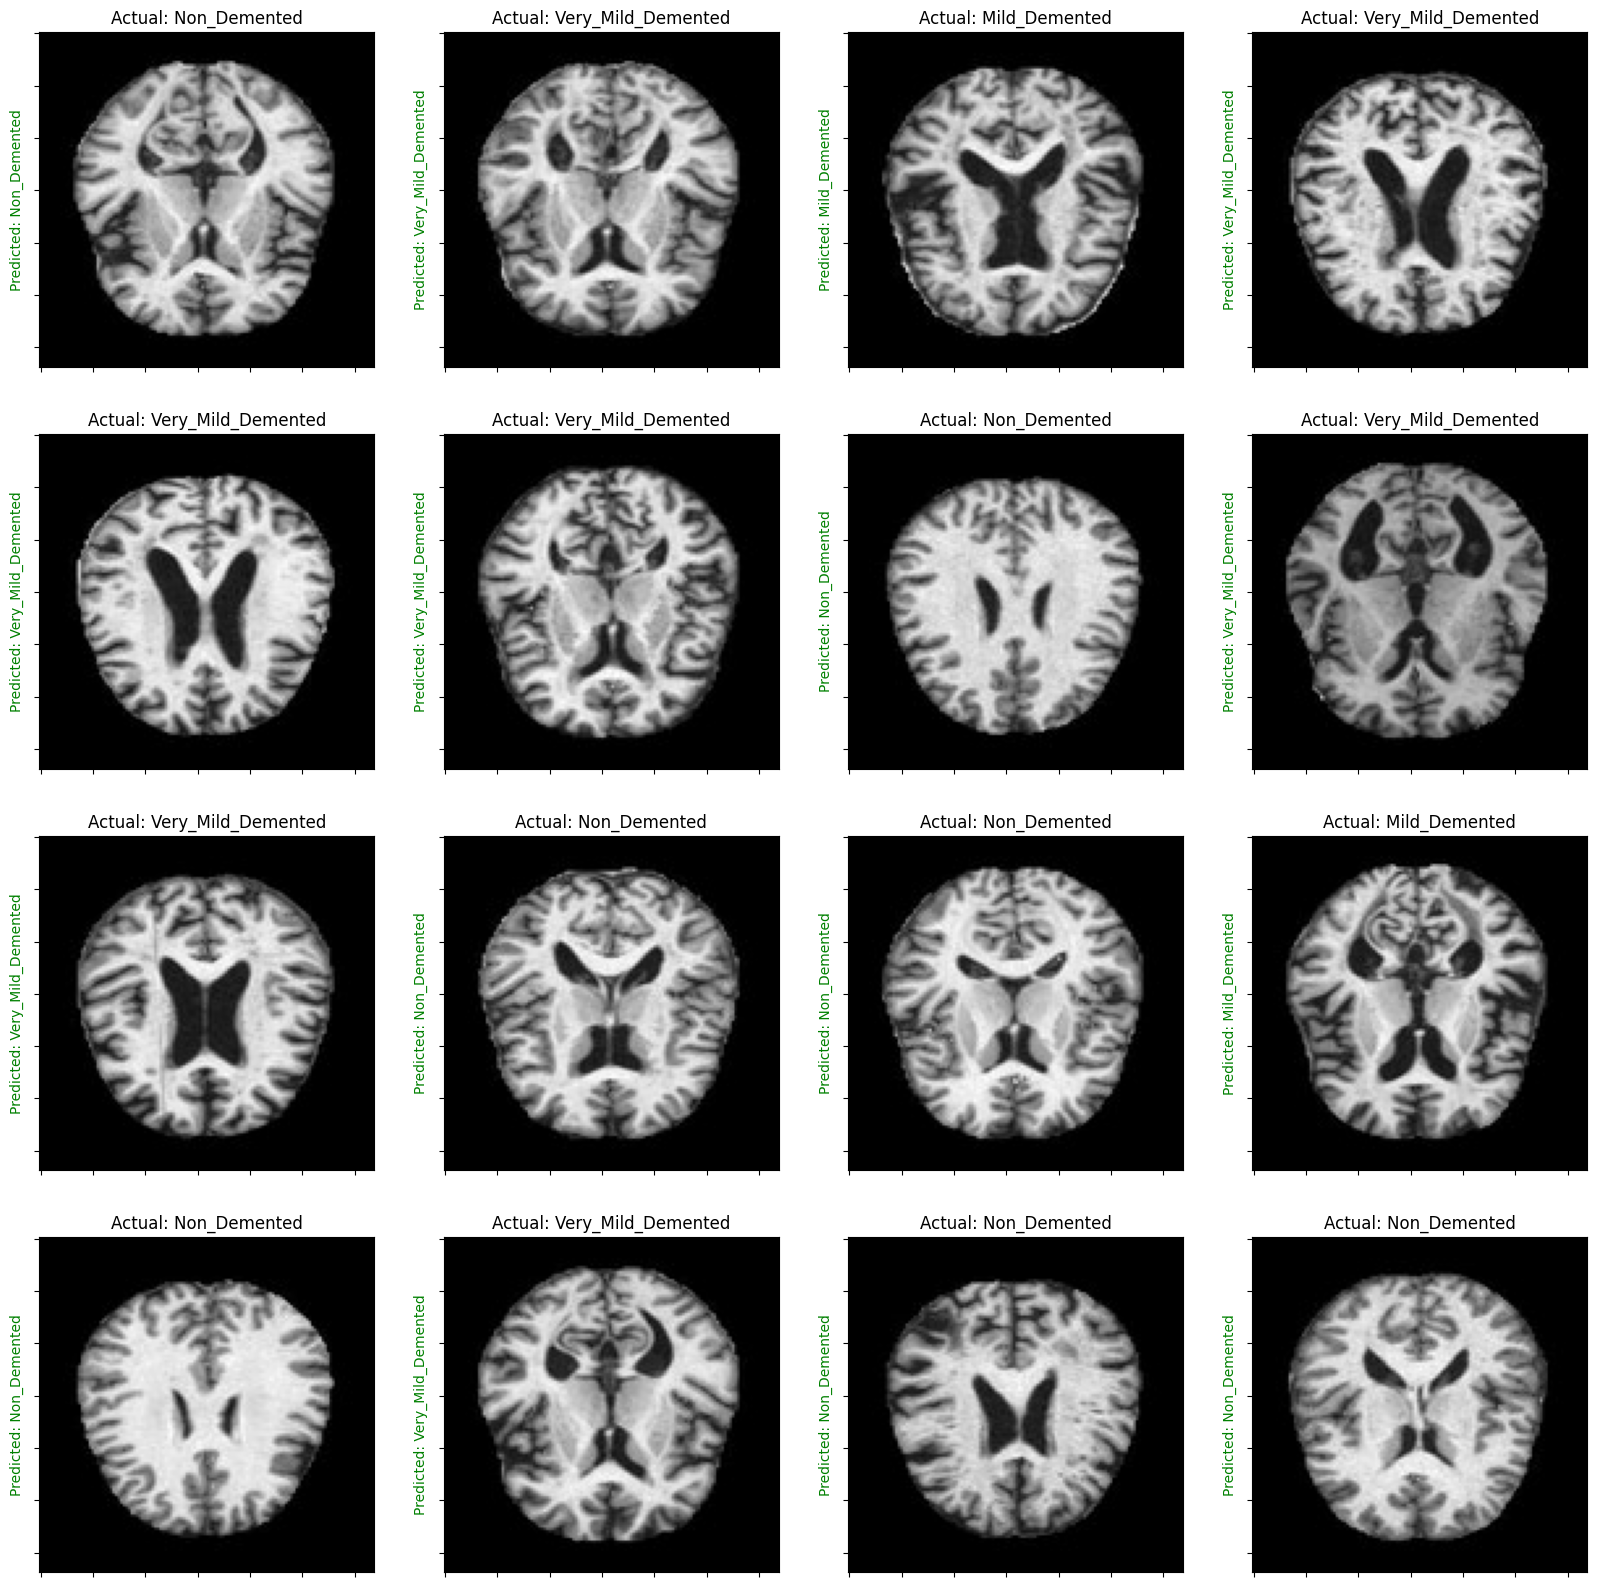

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])